En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath, Path
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

Modelados

In [ ]:
z21_path_m = r"../../data_analysis\all_vars\zafra2021"
z22_path_m = r"../../data_analysis\all_vars\zafra2022"
z23_path_m = r"../../data_analysis\all_vars\zafra2023"

Reales

In [ ]:
z21_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2021/"
z22_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2022/"
z23_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2023/"

In [ ]:
dfs_21_m = [(pd.read_csv(PurePath(z21_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_m) if f.endswith(".csv")]
dfs_22_m = [(pd.read_csv(PurePath(z22_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_m) if f.endswith(".csv")]
dfs_23_m = [(pd.read_csv(PurePath(z23_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_m) if f.endswith(".csv")]
dfs_21_r = [(pd.read_csv(PurePath(z21_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_r) if f.endswith(".csv")]
dfs_22_r = [(pd.read_csv(PurePath(z22_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_r) if f.endswith(".csv")]
dfs_23_r = [(pd.read_csv(PurePath(z23_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_r) if f.endswith(".csv")]

### Estructura de los datos

In [ ]:
zafra2021_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2021_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2022_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2022_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2023_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2023_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

In [ ]:
for i in dfs_21_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2021_m = zafra2021_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True) 
    
    
for i in dfs_22_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2022_m = zafra2022_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)

for i in dfs_23_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2023_m = zafra2023_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)


for i in dfs_21_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2021_r = zafra2021_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_22_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2022_r = zafra2022_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_23_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2023_r = zafra2023_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

In [ ]:
zafra2021_r.round(decimals=3)

## Exportación

In [ ]:
zafra2023_m.to_csv(r'../../results/yield_data/data/zafra23_m.csv', index=False)

En este punto se agregan los rendimientos de manera manual y se quitan las fechas

## Correlacion entre vis y rendimiento

### lectura de los csv

In [2]:
z21_r = pd.read_csv(r'../../results/yield_data/data/zafra21_r.csv')
z22_r = pd.read_csv(r'../../results/yield_data/data/zafra22_r.csv')
z23_r = pd.read_csv(r'../../results/yield_data/data/zafra23_r.csv')
z21_m = pd.read_csv(r'../../results/yield_data/data/zafra21_m.csv')
z22_m = pd.read_csv(r'../../results/yield_data/data/zafra22_m.csv')
z23_m = pd.read_csv(r'../../results/yield_data/data/zafra23_m.csv')

In [3]:
z21_r

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
0,1,0.722026,0.521283,0.611195,0.494867,2.137607,1.079511,0.437886,0.269966,0.508345,0.337102,0.032472,0.978848,70
1,10,0.789002,0.592955,0.674874,0.551287,2.712167,1.652685,0.495965,0.342263,0.580282,0.418252,0.129167,0.836552,80
2,11,0.784050,0.576940,0.669851,0.516115,2.934797,1.600793,0.501269,0.334255,0.572816,0.401794,0.131011,0.831293,80
3,13,0.768197,0.561279,0.643851,0.490355,2.453825,1.338366,0.469358,0.308716,0.543743,0.370580,0.103765,0.880519,65
4,14,0.770016,0.583556,0.663564,0.542240,3.027057,1.565960,0.502094,0.330635,0.591366,0.408295,0.127431,0.832562,75
5,15,0.808480,0.592573,0.689769,0.522207,2.870582,1.514764,0.518706,0.334710,0.578219,0.403675,0.160874,0.781159,75
6,16,0.711976,0.516251,0.595419,0.481171,2.020006,1.045531,0.432154,0.266351,0.494076,0.328699,0.041934,0.951557,40
7,2,0.812483,0.545351,0.693115,0.490050,3.091810,1.362674,0.524393,0.304900,0.608581,0.368623,0.107620,0.874197,75
8,5,0.786533,0.586496,0.677972,0.535719,2.761417,1.503621,0.497870,0.328689,0.580433,0.400643,0.114244,0.845076,80
9,6,0.760924,0.596542,0.654772,0.529127,2.314469,1.410946,0.459308,0.330115,0.538284,0.398992,0.121242,0.818588,80


### eliminación de inconsistencias

In [ ]:
z21_m.drop(z21_m[z21_m['parcela'] == 3].index, inplace=True)
z21_r.drop(z21_r[z21_r['parcela'] == 3].index, inplace=True)
z21_m.drop(z21_m[z21_m['parcela'] == 4].index, inplace=True)
z21_r.drop(z21_r[z21_r['parcela'] == 4].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 1].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 6].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 14].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 16].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 1].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 6].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 14].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 16].index, inplace=True)

Correlación

In [153]:
zafras_m.corr().sort_values(by='rendimiento', ascending=False).round(decimals=3)

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,lluvia_acum,etc_acum,rendimiento
rendimiento,-0.336,0.402,0.269,0.441,0.390,0.474,0.410,0.446,0.334,0.472,0.377,0.280,-0.213,0.471,0.164,1.000
cire_max,-0.040,0.945,0.840,0.962,0.882,1.000,0.975,0.984,0.914,0.989,0.928,0.835,-0.764,-0.164,0.139,0.474
ndre_max,-0.014,0.974,0.874,0.973,0.896,0.989,0.977,0.996,0.939,1.000,0.950,0.873,-0.806,-0.163,0.157,0.472
lluvia_acum,0.070,-0.143,-0.248,-0.172,-0.187,-0.164,-0.218,-0.165,-0.246,-0.163,-0.225,-0.229,0.229,1.000,0.308,0.471
ndre1_max,-0.005,0.981,0.890,0.965,0.895,0.984,0.977,1.000,0.948,0.996,0.953,0.889,-0.827,-0.165,0.188,0.446
gndvi_max,-0.008,0.969,0.856,1.000,0.897,0.962,0.942,0.965,0.907,0.973,0.918,0.826,-0.770,-0.172,0.102,0.441
cire_mean,-0.004,0.947,0.919,0.942,0.936,0.975,1.000,0.977,0.973,0.977,0.981,0.904,-0.847,-0.218,0.145,0.410
ndvi_max,0.048,1.000,0.910,0.969,0.895,0.945,0.947,0.981,0.944,0.974,0.942,0.901,-0.855,-0.143,0.196,0.402
gndvi_mean,-0.030,0.895,0.949,0.897,1.000,0.882,0.936,0.895,0.946,0.896,0.965,0.884,-0.865,-0.187,0.147,0.390
ndre_mean,0.010,0.942,0.972,0.918,0.965,0.928,0.981,0.953,0.995,0.950,1.000,0.950,-0.912,-0.225,0.182,0.377


### solo 21/22 y 22/23

In [152]:
zafras_r = pd.concat([z21_r, z22_r])
zafras_m = pd.concat([z21_m, z22_m, z23_m])

In [14]:
zafras_r

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
0,1,0.722026,0.521283,0.611195,0.494867,2.137607,1.079511,0.437886,0.269966,0.508345,0.337102,0.032472,0.978848,70
1,10,0.789002,0.592955,0.674874,0.551287,2.712167,1.652685,0.495965,0.342263,0.580282,0.418252,0.129167,0.836552,80
2,11,0.784050,0.576940,0.669851,0.516115,2.934797,1.600793,0.501269,0.334255,0.572816,0.401794,0.131011,0.831293,80
3,13,0.768197,0.561279,0.643851,0.490355,2.453825,1.338366,0.469358,0.308716,0.543743,0.370580,0.103765,0.880519,65
4,14,0.770016,0.583556,0.663564,0.542240,3.027057,1.565960,0.502094,0.330635,0.591366,0.408295,0.127431,0.832562,75
5,15,0.808480,0.592573,0.689769,0.522207,2.870582,1.514764,0.518706,0.334710,0.578219,0.403675,0.160874,0.781159,75
6,16,0.711976,0.516251,0.595419,0.481171,2.020006,1.045531,0.432154,0.266351,0.494076,0.328699,0.041934,0.951557,40
7,2,0.812483,0.545351,0.693115,0.490050,3.091810,1.362674,0.524393,0.304900,0.608581,0.368623,0.107620,0.874197,75
8,5,0.786533,0.586496,0.677972,0.535719,2.761417,1.503621,0.497870,0.328689,0.580433,0.400643,0.114244,0.845076,80
9,6,0.760924,0.596542,0.654772,0.529127,2.314469,1.410946,0.459308,0.330115,0.538284,0.398992,0.121242,0.818588,80


In [ ]:
zafras_m.to_csv(r'../../results/yield_data/data/zafra2122_2223_m.csv', index=False)

### Correlacion total

In [ ]:
zafras_r.corr().sort_values(by='rendimiento', ascending=False).round(decimals=3)

In [ ]:
var_mod = 'cire_max'
plt.figure(figsize=(10, 10))
#plt.scatter(z21_r[var_mod], z21_r['rendimiento'], color='#BE3455')
#plt.scatter(z22_r[var_mod], z22_r['rendimiento'], color='#BE3455')
#plt.scatter(z23_r[var_mod], z23_r['rendimiento'], color='#BE3455')
#plt.scatter(z21_m[var_mod], z21_m['rendimiento'], color='#6667AB', label='Modelados')
#plt.scatter(z22_m[var_mod], z22_m['rendimiento'], color='#6667AB')
plt.scatter(z23_m[var_mod], z23_m['rendimiento'], color='#6667AB')
plt.xlabel('CIRE máximo')
plt.ylabel(r'Rendimiento ($ton \cdot ha^{-1}$)')
plt.tight_layout()
#plt.legend(loc='best')
plt.savefig(rf'../../tesis_img/correlacion/cire_max_23_24_modelado.pdf', dpi=150, format='pdf')
plt.show()

### Exportación nuevos datos

In [ ]:
z21_r.to_csv(r'../../results/yield_data/data/zafra21_r.csv', index=False)
z21_m.to_csv(r'../../results/yield_data/data/zafra21_m.csv', index=False)
z22_r.to_csv(r'../../results/yield_data/data/zafra22_r.csv', index=False)
z22_m.to_csv(r'../../results/yield_data/data/zafra22_m.csv', index=False)
z23_r.to_csv(r'../../results/yield_data/data/zafra23_r.csv', index=False)
z23_m.to_csv(r'../../results/yield_data/data/zafra23_m.csv', index=False)
zafras_r.to_csv(r'../../results/yield_data/data/zafras_r.csv', index=False)
zafras_m.to_csv(r'../../results/yield_data/data/zafras_m.csv', index=False)

## Correlación entre los datos climáticos y el rendimiento

Se calculó el valor promedio de x variable en las diferentes fases del crecimiento y se relacionan con el rendimiento anterior

In [139]:
var_name = 'rh12'
fase = 3
rango = 1

In [140]:
var_file_22 = Path(rf'../../results/feno_climate_vars/feno_combs/{var_name}/zafra2022_var_{var_name}_fase_{fase}_rango_{rango}.csv')
var_file_21 = Path(rf'../../results/feno_climate_vars/feno_combs/{var_name}/zafra2021_var_{var_name}_fase_{fase}_rango_{rango}.csv')
var_file_23 = Path(rf'../../results/feno_climate_vars/feno_combs/{var_name}/zafra2021_var_{var_name}_fase_{fase}_rango_{rango}.csv')

In [141]:
var_df_22 = pd.read_csv(var_file_22)
var_df_21 = pd.read_csv(var_file_21)
var_df_23 = pd.read_csv(var_file_23)

In [133]:
var_df_21['temp_c'] = var_df_21['temp'] - 273.15
var_df_22['temp_c'] = var_df_22['temp'] - 273.15
var_df_23['temp_c'] = var_df_23['temp'] - 273.15

In [142]:
var_df_22_r = pd.merge(var_df_22, z22_r, on='parcela', how='inner')
var_df_21_r = pd.merge(var_df_21, z21_r, on='parcela', how='inner')
var_df_23_r = pd.merge(var_df_23, z23_r, on='parcela', how='inner')

In [143]:
var_df_total_r = pd.concat([var_df_21_r, var_df_22_r, var_df_23_r])

In [136]:
var_df_total_r['temp_c'] = var_df_total_r['temp'] - 273.15

In [148]:
var_df_total_.corr()

,parcela,rh12,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
parcela,1.000000,0.039467,-0.146023,0.072524,-0.125091,0.006303,-0.140813,0.037281,-0.157943,0.057333,-0.154545,0.043926,0.147317,-0.163985,-0.336060
rh12,0.039467,1.000000,-0.058948,-0.398785,0.056114,-0.370096,-0.128612,-0.319679,-0.140969,-0.370720,-0.149778,-0.365750,-0.375347,0.376994,-0.018275
ndvi_max,-0.146023,-0.058948,1.000000,0.554660,0.962038,0.601905,0.939293,0.758098,0.974100,0.667887,0.958484,0.683861,0.619409,-0.519237,0.577891
ndvi_mean,0.072524,-0.398785,0.554660,1.000000,0.500990,0.952342,0.561728,0.907405,0.567291,0.979456,0.612094,0.971261,0.956119,-0.946937,0.315883
gndvi_max,-0.125091,0.056114,0.962038,0.500990,1.000000,0.566180,0.922944,0.731768,0.932152,0.621554,0.942168,0.643287,0.564738,-0.457527,0.543336
gndvi_mean,0.006303,-0.370096,0.601905,0.952342,0.566180,1.000000,0.641529,0.921639,0.641283,0.945098,0.685727,0.966189,0.881797,-0.857410,0.422122
cire_max,-0.140813,-0.128612,0.939293,0.561728,0.922944,0.641529,1.000000,0.808587,0.979927,0.683206,0.978678,0.711518,0.622967,-0.522624,0.550360
cire_mean,0.037281,-0.319679,0.758098,0.907405,0.731768,0.921639,0.808587,1.000000,0.790340,0.967162,0.826627,0.975860,0.910401,-0.840096,0.417923
ndre1_max,-0.157943,-0.140969,0.974100,0.567291,0.932152,0.641283,0.979927,0.790340,1.000000,0.683499,0.983173,0.710091,0.628391,-0.527880,0.578301
ndre1_mean,0.057333,-0.370720,0.667887,0.979456,0.621554,0.945098,0.683206,0.967162,0.683499,1.000000,0.723899,0.993844,0.965036,-0.928226,0.360337


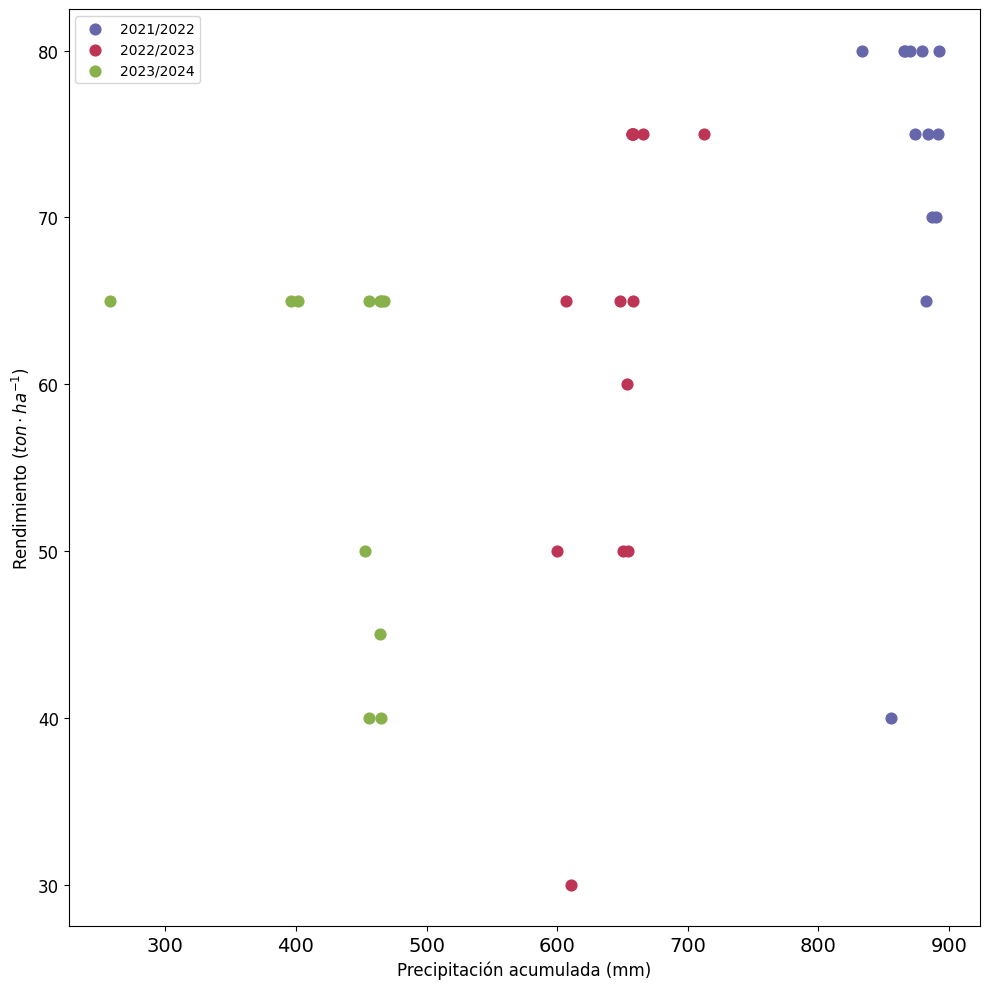

In [166]:
df_name = var_df_total_r
plt.figure(figsize=(10, 10))
#plt.scatter(df_name['temp'], df_name['rendimiento'], color='#BE3455', alpha=1)
#plt.scatter(var_df_21_r['temp_c'], var_df_21_r['rendimiento'], color='#6667AB', label='2021/2022', s=60)
#plt.scatter(var_df_22_r['temp_c'], var_df_22_r['rendimiento'], color='#BE3455', label='2022/2023', s=60)
#plt.scatter(var_df_23_r['temp_c'], var_df_23_r['rendimiento'], color='#88B04B', label='2023/2024', s=60)
plt.scatter(z21_m['lluvia_acum'], z21_m['rendimiento'], color='#6667AB', label='2021/2022', s=60)
plt.scatter(z22_m['lluvia_acum'], z22_m['rendimiento'], color='#BE3455', label='2022/2023', s=60)
plt.scatter(z23_m['lluvia_acum'], z23_m['rendimiento'], color='#88B04B', label='2023/2024', s=60)

plt.ylabel(r'Rendimiento $(ton\cdot ha^{-1})$', fontsize=12)
plt.xlabel(r'Precipitación acumulada (mm)', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(r'../../tesis_img/correlacion/precip_acum_individuales.pdf', dpi=100)
plt.show()

<Figure size 1000x1000 with 0 Axes>

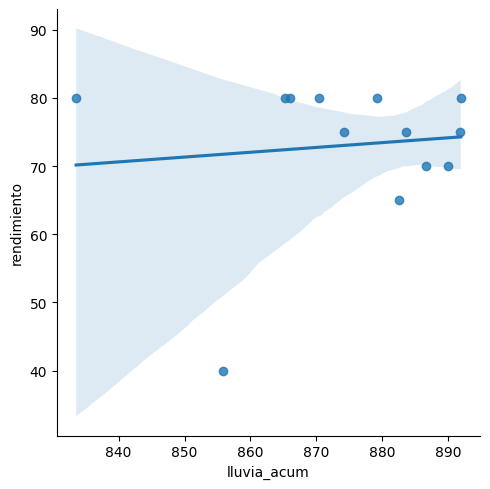

In [158]:
plt.figure(figsize=(10, 10))
sns.lmplot(z21_m, x='lluvia_acum', y='rendimiento')
plt.show()

### solo 2022/2023

In [103]:
var_df_22_r.corr()

,parcela,temp,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
parcela,1.000000,0.069785,-0.245564,-0.110039,-0.135346,-0.109784,-0.215746,-0.124253,-0.247868,-0.121447,-0.207684,-0.128212,-0.016545,-0.051216,-0.374564
temp,0.069785,1.000000,-0.260926,-0.400785,-0.175441,-0.485256,-0.450963,-0.521492,-0.383511,-0.426606,-0.384869,-0.475477,-0.420769,0.379086,-0.325337
ndvi_max,-0.245564,-0.260926,1.000000,0.611794,0.974098,0.662873,0.966011,0.781043,0.987490,0.707933,0.984601,0.729348,0.649881,-0.537136,0.844609
ndvi_mean,-0.110039,-0.400785,0.611794,1.000000,0.592693,0.967824,0.704068,0.945891,0.656188,0.985244,0.695076,0.979448,0.953586,-0.916909,0.710969
gndvi_max,-0.135346,-0.175441,0.974098,0.592693,1.000000,0.652804,0.939839,0.752291,0.948992,0.679514,0.961567,0.705052,0.610972,-0.498306,0.823081
gndvi_mean,-0.109784,-0.485256,0.662873,0.967824,0.652804,1.000000,0.756919,0.956070,0.716697,0.956338,0.747258,0.979641,0.897783,-0.834778,0.760558
cire_max,-0.215746,-0.450963,0.966011,0.704068,0.939839,0.756919,1.000000,0.873546,0.982942,0.792129,0.992100,0.818971,0.726924,-0.613809,0.840840
cire_mean,-0.124253,-0.521492,0.781043,0.945891,0.752291,0.956070,0.873546,1.000000,0.827597,0.978812,0.856749,0.989414,0.924586,-0.851005,0.795758
ndre1_max,-0.247868,-0.383511,0.987490,0.656188,0.948992,0.716697,0.982942,0.827597,1.000000,0.750610,0.993911,0.777666,0.684314,-0.571124,0.826700
ndre1_mean,-0.121447,-0.426606,0.707933,0.985244,0.679514,0.956338,0.792129,0.978812,0.750610,1.000000,0.784311,0.992756,0.960651,-0.912085,0.740531
